In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import itertools
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS 기본 한글 지원 폰트
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('nightlife_crime.csv')

In [7]:
data['robbery_adult'] = data['robbery_Tot'] - data['robbery']
data['forcible_rape_adult'] = data['forcible_rape_Tot'] - data['forcible_rape']
data['murder_adult'] = data['murder_tot'] - data['murder']
data['thef_adult'] = data['thef_tot'] - data['thef']
data['violence_adult'] = data['violence_Tot'] - data['violence']

data['crime_tot'] = data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot']
data['crime_youth_tot'] = data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']
data['murder_ratio'] = data['murder'] / data['murder_tot']
data['robbery_ratio'] = data['robbery'] / data['robbery_Tot']
data['rape_ratio'] = data['forcible_rape'] / data['forcible_rape_Tot']
data['thef_ratio'] = data['thef'] / data['thef_tot']
data['violence_ratio'] = data['violence'] / data['violence_Tot']
data['total_youth_ratio'] = (data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']) / \
                          (data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot'])

data

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,thef_adult,violence_adult,crime_tot,crime_youth_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio
0,강남,283,354,637,0,6,19,140,176,3,...,2344,2428,5422,341,0.000000,0.285714,0.061290,0.056361,0.067588,0.062892
1,강동,146,106,252,0,3,6,193,158,4,...,2173,2554,5244,360,0.000000,0.500000,0.038462,0.081572,0.058260,0.068650
2,강북,79,128,207,0,0,9,166,210,7,...,1268,2439,4257,385,0.000000,0.000000,0.058824,0.115760,0.079275,0.090439
3,강서,113,167,280,0,3,9,273,240,7,...,1823,2967,5585,525,0.000000,0.230769,0.034351,0.130248,0.074836,0.094002
4,관악,223,99,322,0,2,14,170,209,9,...,2536,3089,6345,395,0.000000,0.166667,0.043750,0.062823,0.063372,0.062254
5,광진,19,91,110,0,0,29,155,153,4,...,2871,2472,5909,337,0.000000,0.000000,0.120833,0.051223,0.058286,0.057032
6,구로,38,110,148,0,1,3,157,194,8,...,2178,2813,5646,355,0.000000,0.066667,0.010676,0.067238,0.064516,0.062876
7,금천,60,82,142,0,0,7,146,66,3,...,1421,1988,3781,219,0.000000,0.000000,0.046358,0.093172,0.032132,0.057921
8,노원,30,57,87,0,6,14,227,337,10,...,1966,2386,5130,584,0.000000,0.857143,0.071066,0.103511,0.123761,0.113840
9,도봉,21,55,76,0,6,21,126,107,3,...,937,1380,2664,260,0.000000,0.666667,0.205882,0.118532,0.071957,0.097598


In [4]:
# 1. 청소년, 성인, 전체 범죄 컬럼만 추출해서 새로운 DataFrame 만들기 (원본 data는 유지)
groups_df = data[[
    'murder', 'robbery', 'forcible_rape', 'thef', 'violence',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult',
    'murder_tot', 'robbery_Tot', 'forcible_rape_Tot', 'thef_tot', 'violence_Tot'
]].copy()

# 2. 보기 좋게 컬럼 이름 바꾸기
groups_df.columns = [
    'murder_youth', 'robbery_youth', 'forcible_rape_youth', 'thef_youth', 'violence_youth',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult',
    'murder_total', 'robbery_total', 'forcible_rape_total', 'thef_total', 'violence_total'
]

crime_groups_df = groups_df[[
    'murder_youth', 'robbery_youth', 'forcible_rape_youth', 'thef_youth', 'violence_youth',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult'
]].copy()

crime_groups_total_df = groups_df[[
    'murder_total', 'robbery_total', 'forcible_rape_total', 'thef_total', 'violence_total'
]].copy()

crime_total_df = data[['crime_tot', 'crime_youth_tot']].copy()

# 3. 확인용 출력
crime_groups_df.head()

,murder_youth,robbery_youth,forcible_rape_youth,thef_youth,violence_youth,murder_adult,robbery_adult,forcible_rape_adult,thef_adult,violence_adult
0,0,6,19,140,176,3,15,291,2344,2428
1,0,3,6,193,158,4,3,150,2173,2554
2,0,0,9,166,210,7,14,144,1268,2439
3,0,3,9,273,240,7,10,253,1823,2967
4,0,2,14,170,209,9,10,306,2536,3089


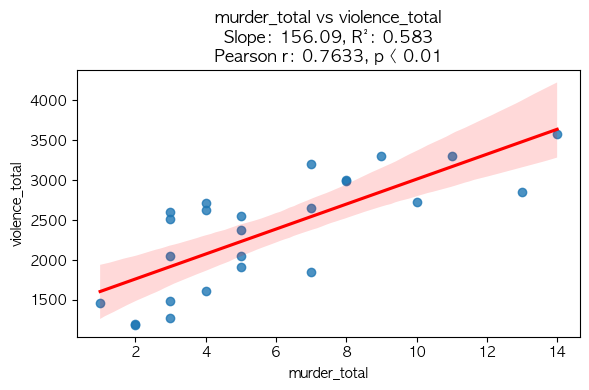

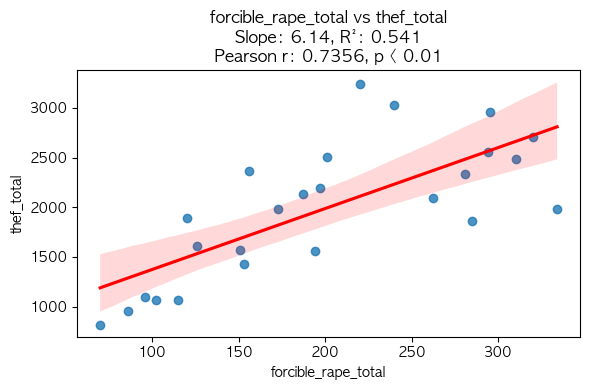

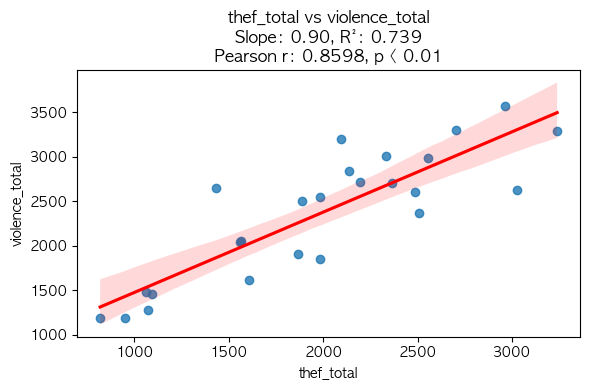

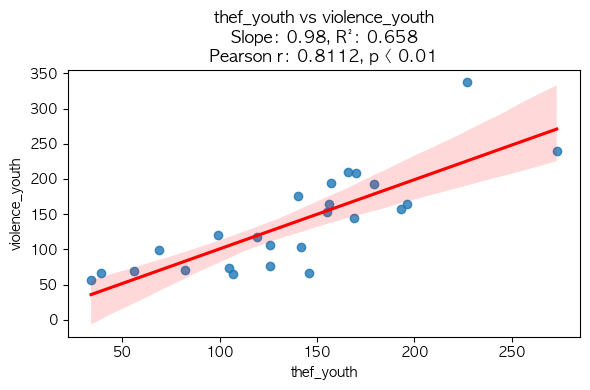

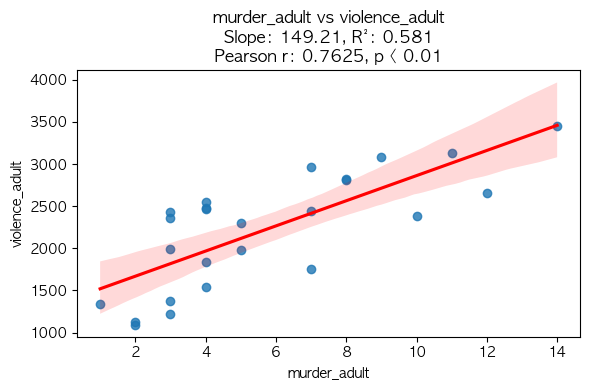

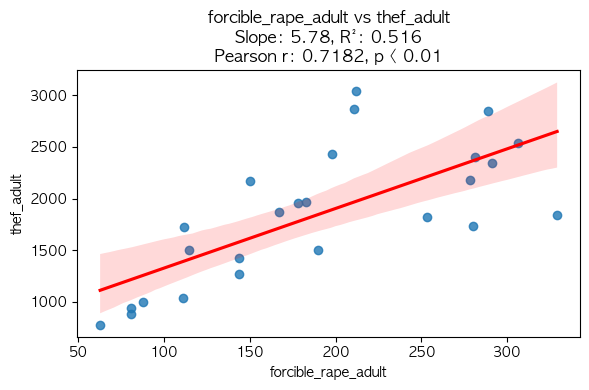

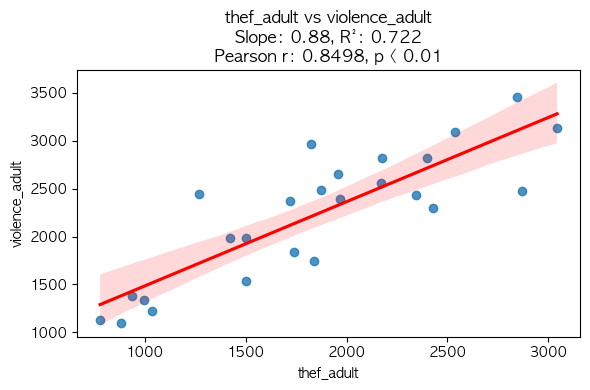

In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


crime_list = [crime_groups_total_df, crime_groups_df, crime_total_df]

# 저장할 폴더 생성
save_dir = "regression_plots"
os.makedirs(save_dir, exist_ok=True)


for i in range(3):
    df_i = crime_list[i]

    # 상관계수 기준
    threshold = 0.7
    corr_matrix = df_i.corr()
    filtered_corr = corr_matrix[(abs(corr_matrix) >= threshold) & (corr_matrix != 1.0)]

    # 쌍 추출 및 정리
    pairs = (
        filtered_corr.stack()
        .reset_index()
        .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
    )
    pairs['pair'] = pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
    pairs = pairs.drop_duplicates(subset='pair').drop(columns='pair')

    # 각 쌍에 대해 회귀 + 상관분석 + 그래프 저장
    for index, row in pairs.iterrows():
        x_col, y_col = row['Feature 1'], row['Feature 2']
        X = df_i[[x_col]].values
        y = df_i[y_col].values

        # 회귀 분석
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        intercept = model.intercept_
        r_squared = model.score(X, y)

        # Pearson 상관계수
        corr_coef, p_value = pearsonr(df_i[x_col], df_i[y_col])

        # 시각화
        plt.figure(figsize=(6, 4))
        sns.regplot(x=x_col, y=y_col, data=df_i, line_kws={"color": "red", "label": "예측값"})
        # p-value 출력 포맷 처리
        p_text = "p < 0.01" if p_value < 0.01 else f"p = {p_value:.8f}"

        # 그래프 타이틀
        plt.title(f"{x_col} vs {y_col}\n"
          f"Slope: {slope:.2f}, R²: {r_squared:.3f}\n"
          f"Pearson r: {corr_coef:.4f}, {p_text}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.tight_layout()
        plt.show()

        # 저장
        filename = f"{x_col}_vs_{y_col}.png".replace("/", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path)
        plt.close()
